https://dados.gov.br/dados/conjuntos-dados/dados-de-programas-habitacionais---sistema-de-habitao---sishab

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
tabela_df = pd.read_csv('/content/_contratacoes_pcmv_pcva.csv', encoding='ISO-8859-1',sep='|',na_values ='NaN')

<ipython-input-7-3c8a4b291f80>:1: DtypeWarning: Columns (6,7,8,10,14,16,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela_df = pd.read_csv('/content/_contratacoes_pcmv_pcva.csv', encoding='ISO-8859-1',sep='|',na_values ='NaN')


In [8]:
tabela_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
uf,280340,27,SP,61744
municipio,280340,5241,São Paulo,4849
situacao_obra,280340,12,Obras Entregues,260896
origem_contrato,280340,3,Pessoa Física,173519
programa,280340,3,PMCMV,159867
modalidade_programa,280340,6,CCFGTS,261780
faixa_grupo_renda,210480,3,02 FGTS - PMCMV,141307
cod_empreendimento,106821,45102,38160330,20
nome_do_empreendimento,31391,28215,PROJETO DE MELHORIA DA QUALIDADE DE,46
agente_financeiro,280340,28,CAIXA,230802


In [9]:
df_filtrado = tabela_df[['uf','situacao_obra','origem_contrato','programa','modalidade_programa','faixa_grupo_renda','agente_financeiro','ano_assinatura_contrato','percentual_obra','valor_operacao','valor_liberado','razao_social_proponente','tipologia','qtd_uh_contratadas','qtd_uh_entregues']]

In [10]:
fn = lambda valor : float(valor.replace('.','').replace(',','.'))

In [11]:
df_filtrado['valor_operacao'] = df_filtrado['valor_operacao'].apply(fn)
df_filtrado['valor_liberado'] = df_filtrado['valor_liberado'].apply(fn)


<ipython-input-11-7f05a628294e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['valor_operacao'] = df_filtrado['valor_operacao'].apply(fn)
<ipython-input-11-7f05a628294e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['valor_liberado'] = df_filtrado['valor_liberado'].apply(fn)


In [12]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280340 entries, 0 to 280339
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   uf                       280340 non-null  object 
 1   situacao_obra            280340 non-null  object 
 2   origem_contrato          280340 non-null  object 
 3   programa                 280340 non-null  object 
 4   modalidade_programa      280340 non-null  object 
 5   faixa_grupo_renda        210480 non-null  object 
 6   agente_financeiro        280340 non-null  object 
 7   ano_assinatura_contrato  280340 non-null  object 
 8   percentual_obra          275846 non-null  object 
 9   valor_operacao           280340 non-null  float64
 10  valor_liberado           280340 non-null  float64
 11  razao_social_proponente  27811 non-null   object 
 12  tipologia                32490 non-null   object 
 13  qtd_uh_contratadas       280340 non-null  int64  
 14  qtd_

áreas para analisar:
1- relação dos Estados e a quantidade de emprestimos e valores de financiamento concedido 
2- relação do tempo de assinatura e termino da obra
3- valor medio das obras por Estado
4- qtd de hab contratadas e qtd de hab entregues
5- agente financeiro dominante por estado(qual banco libera mais emprestimos em cada estado e seu respectivos valores)
6- faixa/grupo de renda por estado
7- quantificar por Estado o tipo de situação da obra
8- programa/ modalidade mais usada por estado
9- relação entre pessoal fisica e juridica(percentual)

In [13]:
df_ce = df_filtrado[df_filtrado['uf'] == 'CE']
df_pb = df_filtrado[df_filtrado['uf'] == 'PB'].shape
df_pe = df_filtrado[df_filtrado['uf'] == 'PE'].shape
df_rn = df_filtrado[df_filtrado['uf'] == 'RN'].shape
df_ba = df_filtrado[df_filtrado['uf'] == 'BA'].shape
df_al = df_filtrado[df_filtrado['uf'] == 'AL'].shape
df_se = df_filtrado[df_filtrado['uf'] == 'SE'].shape

In [14]:
df_Obras_Concluídas = df_filtrado[df_filtrado['situacao_obra']=='Obras Concluídas']
df_obras_entregues = df_filtrado[df_filtrado['situacao_obra']=='Obras Entregues']
df_obras_nao_entregues = df_filtrado[df_filtrado['situacao_obra']=='Obras Não Iniciadas']
df_obras_Obras_Distratadas = df_filtrado[df_filtrado['situacao_obra']=='Obras Distratadas']
df_obras_Obras_Paralisadas = df_filtrado[df_filtrado['situacao_obra']=='Obras Paralisadas']
df_obras_Obras_Andamento = df_filtrado[df_filtrado['situacao_obra']=='Obras em Andamento']
df_obras_Entregues_com_entregas_remanescente = df_filtrado[df_filtrado['situacao_obra']=='Empreendimentos Entregues com entregas remanescente']
df_Obras_Atrasadas = df_filtrado[df_filtrado['situacao_obra']=='Obras Atrasadas']

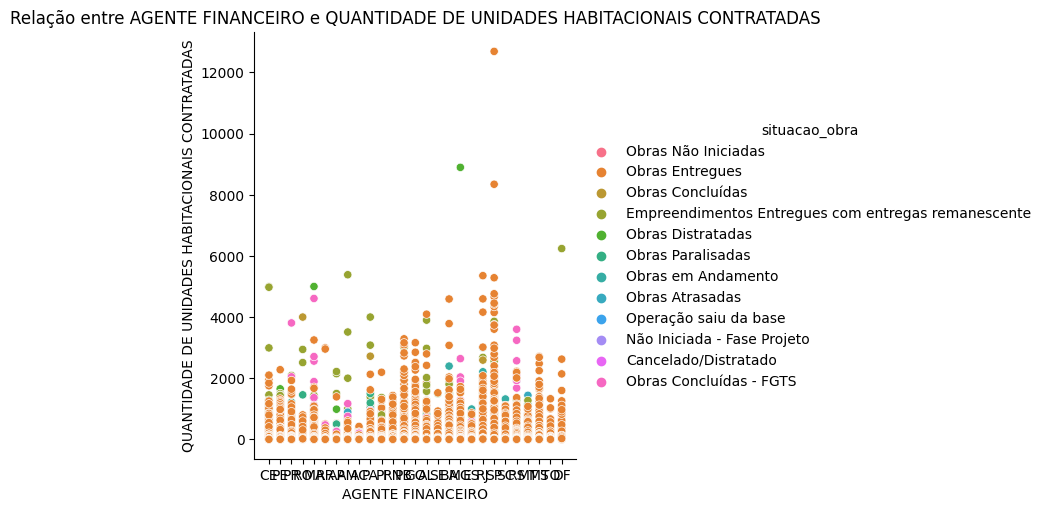

In [17]:
f = sns.relplot(x='uf', y='qtd_uh_contratadas', data=df_filtrado, hue='situacao_obra')
_ = f.set(
    title='Relação entre AGENTE FINANCEIRO e QUANTIDADE DE UNIDADES HABITACIONAIS CONTRATADAS', 
    xlabel='AGENTE FINANCEIRO', 
    ylabel='QUANTIDADE DE UNIDADES HABITACIONAIS CONTRATADAS'
  )

In [ ]:
print('A proporção das obras em relação as obras concluidas ficou em {:.2%}'.format(len(df_Obras_Concluídas)/len(df_filtrado)))
print('A proporção das obras em relação as obras entregues ficou em {:.2%}'.format(len(df_obras_entregues)/len(df_filtrado)))
print('A proporção das obras em relação as Obras Não Iniciadas ficou em {:.2%}'.format(len(df_obras_nao_entregues)/len(df_filtrado)))
print('A proporção das obras em relação as Obras Distratadas ficou em {:.2%}'.format(len(df_obras_Obras_Distratadas)/len(df_filtrado)))
print('A proporção das obras em relação as Obras Paralisadas ficou em {:.2%}'.format(len(df_obras_Obras_Paralisadas)/len(df_filtrado)))
print('A proporção das obras em relação as Obras em Andamento ficou em {:.2%}'.format(len(df_obras_Obras_Andamento)/len(df_filtrado)))
print('A proporção das obras em relação as Obras Entregues com entregas remanescente ficou em {:.2%}'.format(len(df_obras_Entregues_com_entregas_remanescente)/len(df_filtrado)))
print('A proporção das obras em relação as Obras Atrasadas ficou em {:.2%}'.format(len(df_Obras_Atrasadas)/len(df_filtrado)))

A proporção das obras em relação as obras concluidas ficou em 0.08%
A proporção das obras em relação as obras entregues ficou em 93.06%
A proporção das obras em relação as Obras Não Iniciadas ficou em 0.40%
A proporção das obras em relação as Obras Distratadas ficou em 0.11%
A proporção das obras em relação as Obras Paralisadas ficou em 0.36%
A proporção das obras em relação as Obras em Andamento ficou em 1.36%
A proporção das obras em relação as Obras Entregues com entregas remanescente ficou em 0.69%
A proporção das obras em relação as Obras Atrasadas ficou em 0.04%


In [ ]:
contratados = df_filtrado['qtd_uh_contratadas'].sum()
entregues = df_filtrado['qtd_uh_entregues'].sum()
print('A quantidade de unidades de habitação contratadas em relação a quantidade entregue (até o momento) ficou em {:.2%} , onde foram contratados {} unidades e foram entregues {}'.format(entregues/contratados,contratados,entregues ))

A quantidade de unidades de habitação contratadas em relação a quantidade entregue (até o momento) ficou em 75.29% , onde foram contratados 9827820 unidades e foram entregues 7398897


In [ ]:
contratados2 = df_ce['qtd_uh_contratadas'].sum()
entregues2 = df_ce['qtd_uh_entregues'].sum()
print('No CE a quantidade de obras contratadas em relação a quantidade entregue ficou em {:.2%}'.format(entregues2/contratados2))

No CE a quantidade de obras contratadas em relação a quantidade entregue ficou em 82.71%


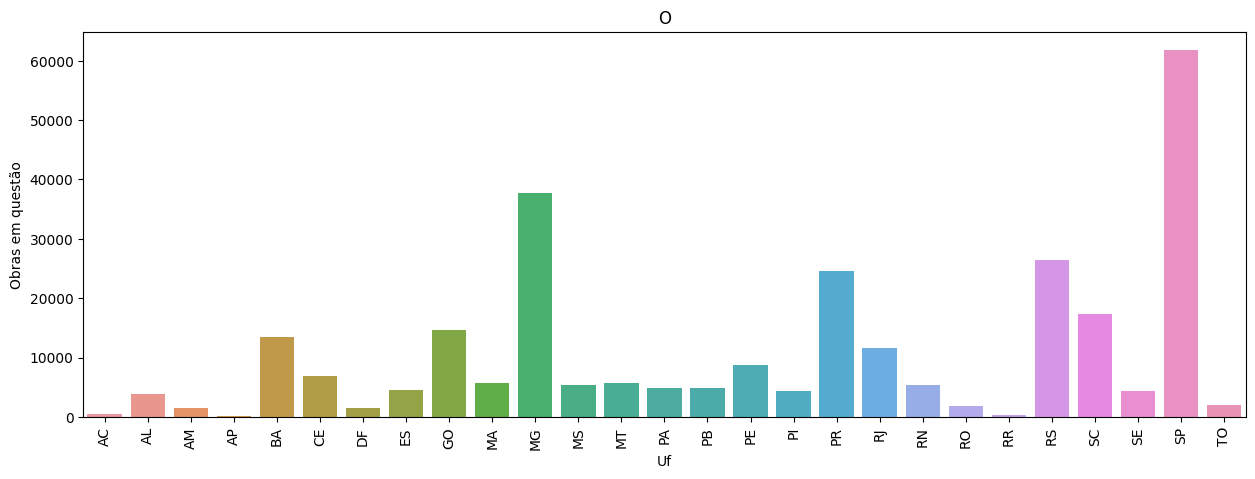

In [ ]:
coluna = 'uf'
titulos = 'Obras no Brasil'

eixo = 0
max_y = 0

figura, eixos = plt.subplots(1, figsize=(15, 5), sharex=True)

df_to_plot = df_filtrado[coluna].value_counts().to_frame()
df_to_plot.rename(columns={coluna: 'freq'}, inplace=True)
df_to_plot[coluna] = df_to_plot.index
df_to_plot.sort_values(by=[coluna], inplace=True)
df_to_plot.sort_values(by=[coluna])

f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['freq'])
f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Obras em questão')
f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

figura.show()

In [ ]:
'''storytelling :
como demonstra a tabela a seguir o Estado de São paulo, seguido de Minas Gerais e Rio Grande do Sul lideram em disparada o numero em obras entregues'''

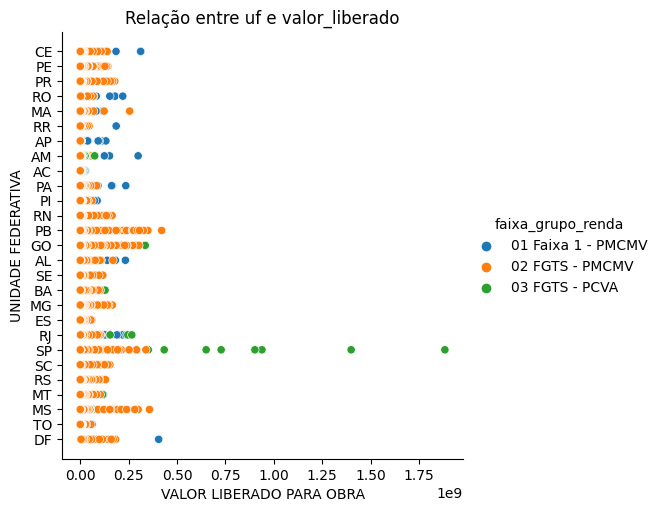

In [ ]:
f = sns.relplot(x='valor_liberado', y='uf', data=df_filtrado, hue='faixa_grupo_renda')
_ = f.set(
    title='Relação entre uf e valor_liberado', 
    xlabel='VALOR LIBERADO PARA OBRA', 
    ylabel='UNIDADE FEDERATIVA'
  )

5. Storytelling
O storytelling no contexto de dados é um técnica de apresentação de resultados orientado a dados, ou seja, contar uma história baseada nos insights que foram gerados através da análise dos dados. Notebooks como este do Google Colab e os do Kaggle são excelentes ferramentas para conduzir e compartilhar storytelling de dados devido a natureza texto-código de suas céluas.

Para você montar o seu portifólio, eu sugiro a construção de um notebook com a seguinte estrutura (vou disponibiliza-la nos exercícios):

Título;
Breve descrição do problema;
Código de importação de bibliotecas;
Código o download/carregamento/geração de dados;
Etapa de exploração;
Etapa de limpeza e transformação;
Etapa de análise (com visualizações);
Resumo dos insights gerados.
Busquei organizar este notebook desta forma. Ademais, os notebooks presentes na plataforma do Kaggle são excelentes exemplos a serem seguidos, em especial os primeiros colocados em competições.

Para finalizar, algumas dicas:

Estruture seu código sempre de acordo com as boas práticas PEP8, assim ele será mais legível para o leitor;
Sempre se preocupe com a aparência dos seus gráficos, todos devem ter (no mínimo) título no topo e nos eixos;
Use e abuso das células de texto para estruturar seu notebook, siga as mesmas técnicas que eu utilizo nos notebooks do curso para estruturar seu texto.